<a href="https://colab.research.google.com/github/Bichitrananda/Performance-evaluation-of-Machine-learning-algorithms-in-Biomedical-Document-Classification/blob/master/BC3_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My Drive

/content/gdrive/My Drive


In [0]:
ls

 20_cnn_model.json             'Getting started.pdf'
 20n_cnn_model1.json            glove.6B.50d.txt
 20n_cnn_model.json             IMDB_weights.best.hdf5
 20news_weights.best1.hdf5      MISSION/
 20news_weights.best.hdf5       model.json
 BC3_part1.csv                  model.yaml
 BC3_part2.csv                  odia-dataset/
 BENGALI/                       project_1_reuter.ipynb
 bp_mll_keras.py                __pycache__/
 bp_mll.py                      RCNN_BC3-P2.ipynb
 cnn_frs_farm_model.json        Reuter_cnn_model.json
'Colab Notebooks'/              Reuter_weights.best.hdf5
'Copy of farm-ads_tr.csv'       RMDL/
'Copy of FRS_TREC.ipynb'       'ROUGH SET'/
 data1.csv                      SVM-CNN/
 data3.csv                      test.csv
 data4.csv                      test_labels.csv
 data.csv                       TEXT_CODE/
 data_WOS5736.csv               text_feature_extraction.py
'DEEP LEARING'/                 train.csv
 diabetes.csv                   trec.csv
 diabetes.ip

In [0]:
import numpy as np
import sklearn
from sklearn.datasets import load_files
import sys
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import pandas as pd
#Data description
df2=pd.read_csv('BC3_part1.csv')
df2.head()


,PMID,Label,Journal Title ISO Abbreviation,NLM ID,Year,Title,Abstract
0,17502104,1,Plant Signal Behav,101291431,2009,Plant caspase-like proteases in plant programm...,Programmed cell death (PCD) is a genetically-c...
1,17503969,1,Plant Signal Behav,101291431,2009,"The ER body, a new organelle in Arabidopsis th...",Plants develop various ER-derived structures w...
2,17505518,1,Plant Signal Behav,101291431,2009,Biomechanics of climbing palms and how they cl...,Climbing plants have fascinated botanists sinc...
3,17510629,1,Plant Signal Behav,101291431,2009,Intracellular Ca2+ stores could participate to...,"In Arabidopsis thaliana cell suspension, absci..."
4,17511879,1,Plant Signal Behav,101291431,2009,Carbon and nitrogen nutrient balance signaling...,Cellular carbon (C) and nitrogen (N) metabolis...


In [0]:
df2.groupby('Label').size()

Label
0    1140
1    1140
dtype: int64

In [0]:
#sentences=df2['Abstract']
#labels=df2['Label']
#split the data into train and test dataset
#print(len(sentences))
train_data=df2['Abstract']
Y=df2['Label']
print(len(train_data))
bbc_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, encoding='latin-1')
bbc_counts = bbc_vec.fit_transform(train_data.values.astype('U'))
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(bbc_counts)
print(X.shape)

2280
(2280, 11961)


In [0]:
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=10, random_state=7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.546053 (0.051383)
DT: 0.533772 (0.053143)
MNB: 0.589474 (0.072314)
BNB: 0.599561 (0.100878)
RF: 0.607895 (0.120725)
SVM: 0.608333 (0.113172)
PPN: 0.565351 (0.045090)
SGD: 0.548246 (0.055235)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


Ridge: 0.575000 (0.093996)
RC: 0.620175 (0.129028)
PA: 0.551754 (0.057280)
BPN: 0.564035 (0.058292)


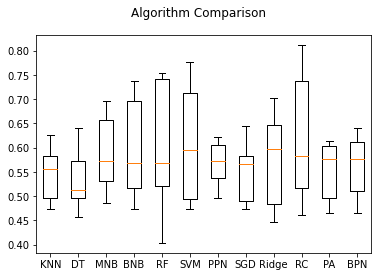

In [0]:
#Comparision of Algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn import svm
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('DT', tree.DecisionTreeClassifier()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('MNB', MultinomialNB(alpha=.01)))
models.append(('BNB', BernoulliNB(alpha=.01)))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('SVM', svm.SVC()))
models.append(('PPN', Perceptron(max_iter=50, tol=1e-3)))
models.append(('SGD', SGDClassifier(alpha=.0001, max_iter=50,penalty="l1")))
models.append(('Ridge', RidgeClassifier(tol=1e-2, solver="sag")))
models.append(('RC', NearestCentroid()))
models.append(('PA', PassiveAggressiveClassifier(max_iter=50, tol=1e-3)))
models.append(('BPN', MLPClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = StratifiedKFold(n_splits=10)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [0]:
#.......Evaluationg Accuracy, precision, recall, f1-score for all algo....#

In [0]:
#.................SVM................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn import svm
model = svm.SVC()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

In [0]:
a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.6083333333333334 0.11317234369875988
Precision: 0.6198525723560552 0.11556193014959684
Recall: 0.6083333333333334 0.11317234369875988
F1-score: 0.5858756600391822 0.13045189308903948


In [0]:
#.....................SVM.....................
from sklearn import svm
from sklearn.model_selection import cross_validate
model = svm.SVC()
#model = LogisticRegression()
#precision_score
scoring = ['accuracy','precision','recall','f1_weighted']
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
results = cross_validate(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy=",results["test_accuracy"].mean(),results["test_accuracy"].std())
print("F1_score=",results["test_f1_weighted"].mean(),results["test_f1_weighted"].std())
print("Precision=",results["test_precision"].mean(),results["test_precision"].std())
print("Recall=",results["test_recall"].mean(),results["test_recall"].std())

Accuracy= 0.6083333333333334 0.11317234369875988
F1_score= 0.5858756600391822 0.13045189308903948
Precision= 0.6485869281336863 0.1291525130834647
Recall= 0.6263157894736842 0.1798652072164187


In [0]:
#.................KNN................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn import svm
model = KNeighborsClassifier(n_neighbors=10)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.5460526315789473 0.05138322155201746
Precision: 0.5484861643919687 0.05270726739821988
Recall: 0.5460526315789473 0.05138322155201746
F1-score: 0.5405311051704867 0.05206317590420268


In [0]:
#...................KNN............
from sklearn import svm
from sklearn.model_selection import cross_validate
model = KNeighborsClassifier(n_neighbors=10)
scoring = ['accuracy','precision','recall','f1_weighted']
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
results = cross_validate(model, X, Y, cv=kfold, scoring=scoring)
#print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())
print("Accuracy=",results["test_accuracy"].mean(),results["test_accuracy"].std())
print("F1_score=",results["test_f1_weighted"].mean(),results["test_f1_weighted"].std())
print("Precision=",results["test_precision"].mean(),results["test_precision"].std())
print("Recall=",results["test_recall"].mean(),results["test_recall"].std())


Accuracy= 0.5460526315789473 0.05138322155201746
F1_score= 0.5405311051704867 0.05206317590420268
Precision= 0.5583251084012705 0.05997925042259909
Recall= 0.5017543859649123 0.08566003940865757


In [0]:
#.................DT................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn import tree
model = tree.DecisionTreeClassifier()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.5276315789473685 0.05418220176401385
Precision: 0.5274083300637529 0.05469260792983177
Recall: 0.5276315789473685 0.05418220176401385
F1-score: 0.5242580602584967 0.056543556052316424


In [0]:
#................DT...................
from sklearn import tree
from sklearn.model_selection import cross_validate
model = tree.DecisionTreeClassifier()
scoring = ['accuracy','precision','recall','f1_weighted']
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
results = cross_validate(model, X, Y, cv=kfold, scoring=scoring)
#print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())
print("Accuracy=",results["test_accuracy"].mean(),results["test_accuracy"].std())
print("F1_score=",results["test_f1_weighted"].mean(),results["test_f1_weighted"].std())
print("Precision=",results["test_precision"].mean(),results["test_precision"].std())
print("Recall=",results["test_recall"].mean(),results["test_recall"].std())

Accuracy= 0.531578947368421 0.0448485018637341
F1_score= 0.5278577198496105 0.0470934223035891
Precision= 0.5339628087647421 0.04778209118794641
Recall= 0.5394736842105263 0.08221783406057091


In [0]:
#.................RF................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.6035087719298247 0.11014274853054433
Precision: 0.6136196882059589 0.11329644628351601
Recall: 0.6035087719298247 0.11014274853054433
F1-score: 0.5821394102250016 0.12750675233638384


In [0]:
#........................RF..........
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
model = RandomForestClassifier(n_estimators=100)
scoring = ['accuracy','precision','recall','f1_weighted']
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
results = cross_validate(model, X, Y, cv=kfold, scoring=scoring)
#print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())
print("Accuracy=",results["test_accuracy"].mean(),results["test_accuracy"].std())
print("F1_score=",results["test_f1_weighted"].mean(),results["test_f1_weighted"].std())
print("Precision=",results["test_precision"].mean(),results["test_precision"].std())
print("Recall=",results["test_recall"].mean(),results["test_recall"].std())

Accuracy= 0.6175438596491228 0.1081618431003393
F1_score= 0.5968726512468833 0.12452258649199789
Precision= 0.6666334151644275 0.13707108031881698
Recall= 0.5868421052631578 0.18560251017183685


In [0]:
#.................MNB................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = MultinomialNB(alpha=.01)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.5894736842105263 0.07231390822991209
Precision: 0.595719992646122 0.07149267873672008
Recall: 0.5894736842105263 0.07231390822991209
F1-score: 0.5769387652136826 0.08143204981508778


In [0]:
#.................BNB................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = BernoulliNB(alpha=.01)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.599561403508772 0.10087814644858327
Precision: 0.6042009453693173 0.10208612014035985
Recall: 0.599561403508772 0.10087814644858327
F1-score: 0.5840709256310518 0.11376032656091035


In [0]:
#........................PPN..........
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_validate
model = Perceptron(max_iter=50, tol=1e-3)
scoring = ['accuracy','precision','recall','f1_weighted']
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
results = cross_validate(model, X, Y, cv=kfold, scoring=scoring)
#print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())
print("Accuracy=",results["test_accuracy"].mean(),results["test_accuracy"].std())
print("F1_score=",results["test_f1_weighted"].mean(),results["test_f1_weighted"].std())
print("Precision=",results["test_precision"].mean(),results["test_precision"].std())
print("Recall=",results["test_recall"].mean(),results["test_recall"].std())

Accuracy= 0.5653508771929825 0.04509019380198588
F1_score= 0.5577877724577848 0.04992833467586304
Precision= 0.5729209055736341 0.051582694976607196
Recall= 0.5833333333333333 0.10513515609193642


In [0]:
#........................SGD..........
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_validate
model = SGDClassifier(alpha=.0001, max_iter=50,penalty="l1")
scoring = ['accuracy','precision','recall','f1_weighted']
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
results = cross_validate(model, X, Y, cv=kfold, scoring=scoring)
#print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())
print("Accuracy=",results["test_accuracy"].mean(),results["test_accuracy"].std())
print("F1_score=",results["test_f1_weighted"].mean(),results["test_f1_weighted"].std())
print("Precision=",results["test_precision"].mean(),results["test_precision"].std())
print("Recall=",results["test_recall"].mean(),results["test_recall"].std())

Accuracy= 0.5482456140350878 0.061026410985705555
F1_score= 0.5417340289871386 0.06390722001456284
Precision= 0.559782704966272 0.06500525444593773
Recall= 0.5508771929824561 0.08943927787039217


In [0]:
#........................Ridge..........
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_validate
model = RidgeClassifier(tol=1e-2, solver="sag")
scoring = ['accuracy','precision','recall','f1_weighted']
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
results = cross_validate(model, X, Y, cv=kfold, scoring=scoring)
#print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())
print("Accuracy=",results["test_accuracy"].mean(),results["test_accuracy"].std())
print("F1_score=",results["test_f1_weighted"].mean(),results["test_f1_weighted"].std())
print("Precision=",results["test_precision"].mean(),results["test_precision"].std())
print("Recall=",results["test_recall"].mean(),results["test_recall"].std())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


Accuracy= 0.5754385964912281 0.09437063724758478
F1_score= 0.5605302344075321 0.10375288914335086
Precision= 0.6059979318192484 0.10772814434622928
Recall= 0.5868421052631578 0.1311953472664031


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


In [0]:
#........................RC..........
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_validate
model = NearestCentroid()
scoring = ['accuracy','precision','recall','f1_weighted']
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
results = cross_validate(model, X, Y, cv=kfold, scoring=scoring)
#print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())
print("Accuracy=",results["test_accuracy"].mean(),results["test_accuracy"].std())
print("F1_score=",results["test_f1_weighted"].mean(),results["test_f1_weighted"].std())
print("Precision=",results["test_precision"].mean(),results["test_precision"].std())
print("Recall=",results["test_recall"].mean(),results["test_recall"].std())

Accuracy= 0.6201754385964913 0.12902790181190804
F1_score= 0.5978813859969437 0.14613300473121008
Precision= 0.6647754383056655 0.14546796673822454
Recall= 0.6166666666666668 0.1916240066539971


In [0]:
#........................PA..........
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_validate
model = PassiveAggressiveClassifier(max_iter=50, tol=1e-3)
scoring = ['accuracy','precision','recall','f1_weighted']
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
results = cross_validate(model, X, Y, cv=kfold, scoring=scoring)
#print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())
print("Accuracy=",results["test_accuracy"].mean(),results["test_accuracy"].std())
print("F1_score=",results["test_f1_weighted"].mean(),results["test_f1_weighted"].std())
print("Precision=",results["test_precision"].mean(),results["test_precision"].std())
print("Recall=",results["test_recall"].mean(),results["test_recall"].std())

Accuracy= 0.5557017543859649 0.06286022689727665
F1_score= 0.5480225329898447 0.06570714534183252
Precision= 0.5749680354767821 0.07572744323180547
Recall= 0.55 0.08040085016141918


In [0]:
#........................BPN..........
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_validate
model = MLPClassifier()
scoring = ['accuracy','precision','recall','f1_weighted']
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
results = cross_validate(model, X, Y, cv=kfold, scoring=scoring)
#print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())
print("Accuracy=",results["test_accuracy"].mean(),results["test_accuracy"].std())
print("F1_score=",results["test_f1_weighted"].mean(),results["test_f1_weighted"].std())
print("Precision=",results["test_precision"].mean(),results["test_precision"].std())
print("Recall=",results["test_recall"].mean(),results["test_recall"].std())

In [0]:
#.......................END..........................